In [106]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [107]:
np.random.seed(0)

In [108]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [109]:
print (x_train.shape)
print(x_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [110]:
assert(x_train.shape[0] == y_train.shape[0])    # number of images != number of labels
assert(x_test.shape[0] == y_test.shape[0])      # number of images != number of labels
assert(x_train.shape[1:] == (28, 28))           # dimention of the images aren't 28*28

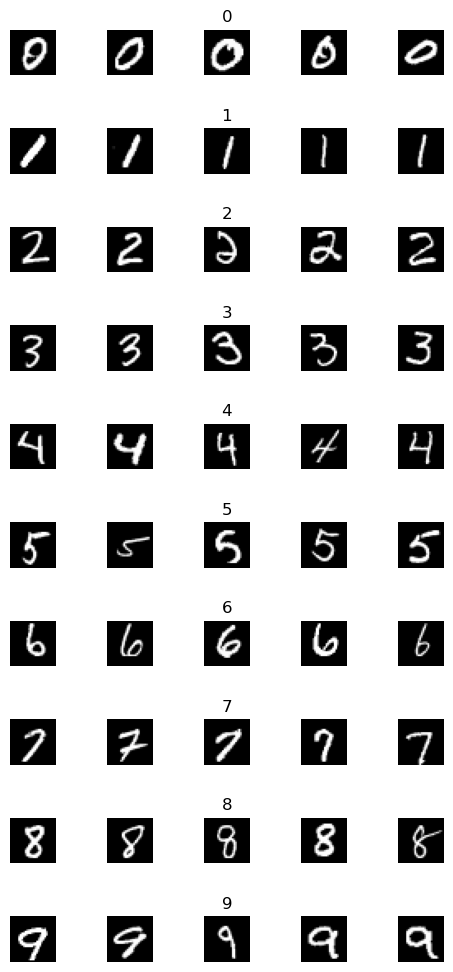

In [111]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize= (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1))],cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

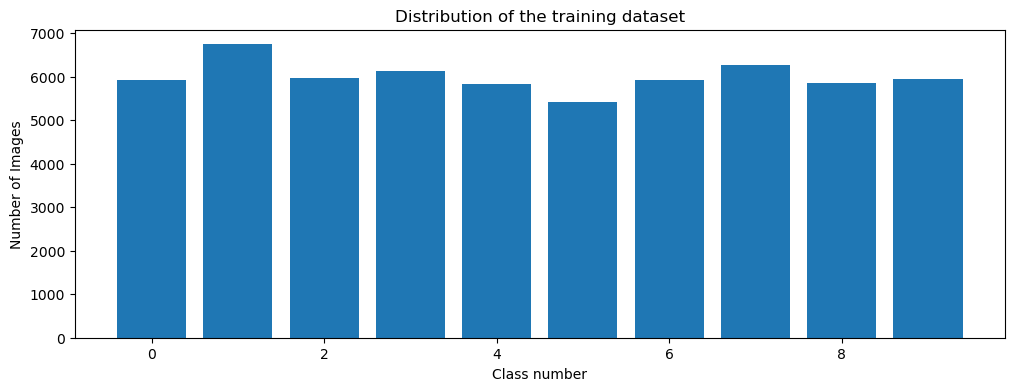

In [112]:
print (num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")

In [113]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [114]:
#normalizing our data to be in the range 0:255 -> 0:1
x_train =x_train / 255                  
x_test =x_test / 255

In [115]:
#flatten our Images
pix_num = 28*28
x_train = x_train.reshape(x_train.shape[0], pix_num)
x_test = x_test.reshape(x_test.shape[0], pix_num)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [116]:
def create_model():
    model= Sequential()
    model.add(Dense(10, input_dim=pix_num, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
    return model 

In [117]:
model = create_model()
print(model.summary())

c:\Users\3omd4\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,490 (33.16 KB)

 Trainable params: 8,490 (33.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [118]:
history= model.fit(x_train, y_train, validation_split=0.1, epochs = 28, batch_size= 200, verbose=1, shuffle=1)

Epoch 1/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7384 - loss: 0.7917 - val_accuracy: 0.9307 - val_loss: 0.2403
Epoch 2/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.2853 - val_accuracy: 0.9402 - val_loss: 0.2081
Epoch 3/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2529 - val_accuracy: 0.9332 - val_loss: 0.2227
Epoch 4/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9322 - loss: 0.2277 - val_accuracy: 0.9427 - val_loss: 0.1922
Epoch 5/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9321 - loss: 0.2178 - val_accuracy: 0.9405 - val_loss: 0.2051
Epoch 6/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.2119 - val_accuracy: 0.9483 - val_loss: 0.1821
Epoch 7/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2060 - val_accuracy: 0.9460 - val_loss: 0.1824
Epoch 8/28
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.1948 - val_accuracy: 0.

Text(0.5, 0, 'epochs')

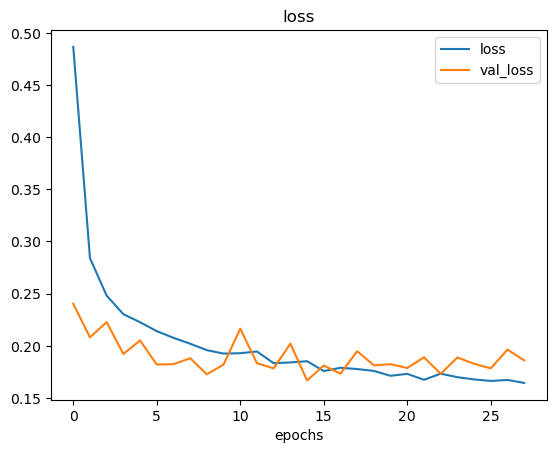

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

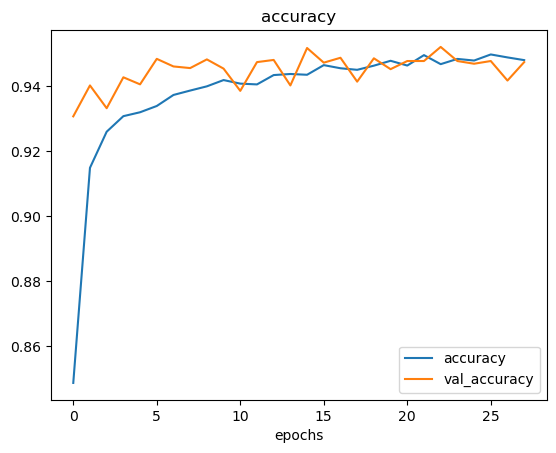

In [120]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [121]:
score = model.evaluate(x_test, y_test, verbose=0)
print(type(score))
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

<class 'list'>
Test score:  0.23528869450092316
Test accuracy:  0.9386000037193298


<Response [200]>


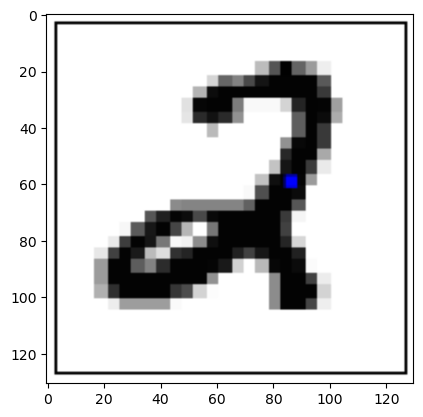

In [122]:
import requests
from PIL import Image
url='https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)#200 is a successful get request
img = Image.open(response.raw)
plt.imshow(img)

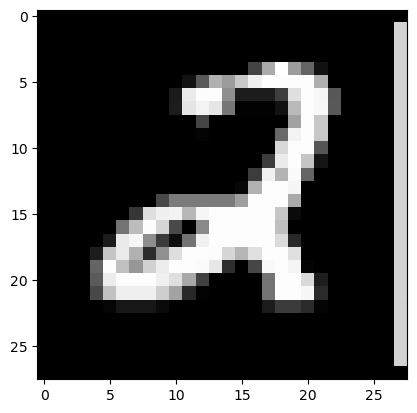

In [123]:
import cv2

img_arr=np.asarray(img)
resized = cv2.resize(img_arr, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))

In [124]:
#normalizing and flatting before recongition

image = image /255
image = image.reshape(1, 28*28)

In [125]:
predictions = model.predict(image)
predicted_classes = np.argmax(predictions, axis=1)
print("prediction digits: ", str(predicted_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
prediction digits:  [2]
